## Boston House Price Prediction using Linear Regression

<pre>This is a simple Linear Regression Model, in which we are using Boston Housing Dataset.
In this Dataset there are many features and our target is to predict the price of Houses

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Lets load the Boston Housing Dataset

In [2]:
# loading dataset from sklearn library
from sklearn.datasets import load_boston
boston = load_boston()

C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
# Lets check the Description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# Lets check data of the dataset
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [6]:
# Lets check features of the dataset
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
# Lets check the target of the dataset
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

<pre>Boston House Pricing Dataset is not structure right now.
So we have to make dataframe out of it

## Preparing the Dataset

In [8]:
# creating a dataframe with respect to boston housing data
df = pd.DataFrame(boston.data, columns = boston.feature_names)

In [9]:
# adding target column
df['Price'] = boston.target

<pre>Our dataframe is ready lets look at it

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Lets Analyze the Dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [12]:
# summarizing the data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
# checking for missing values
df.isnull().mean() / 100

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
Price      0.0
dtype: float64

<pre>There are no missing values in our data 

## Exploratory Data Analysis

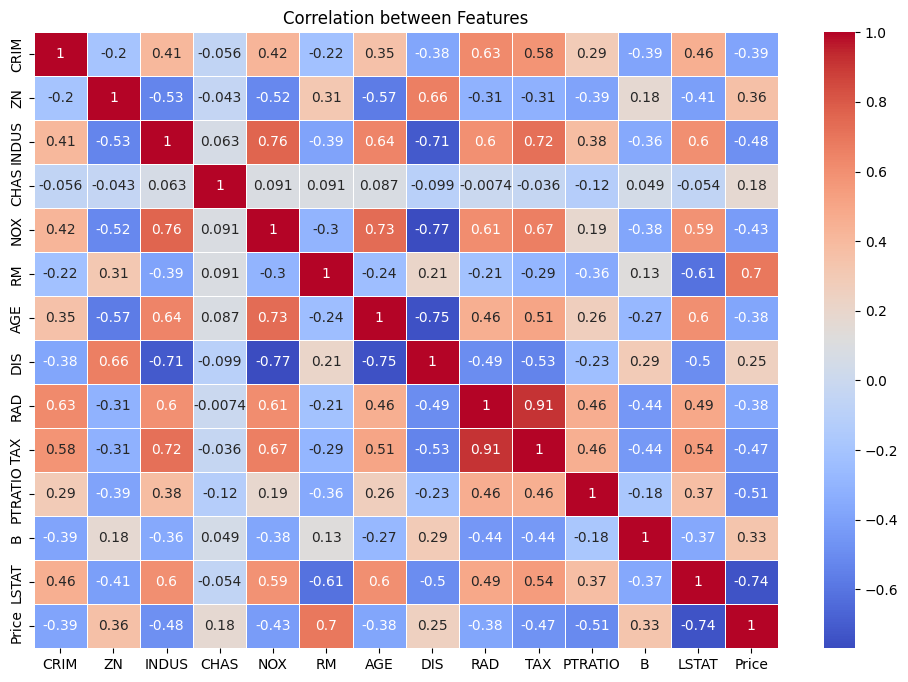

In [14]:
# checking the correlation between the features
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot = True, cmap='coolwarm', linewidths = 0.5)
plt.title('Correlation between Features')
plt.show()

<Figure size 2000x1500 with 0 Axes>

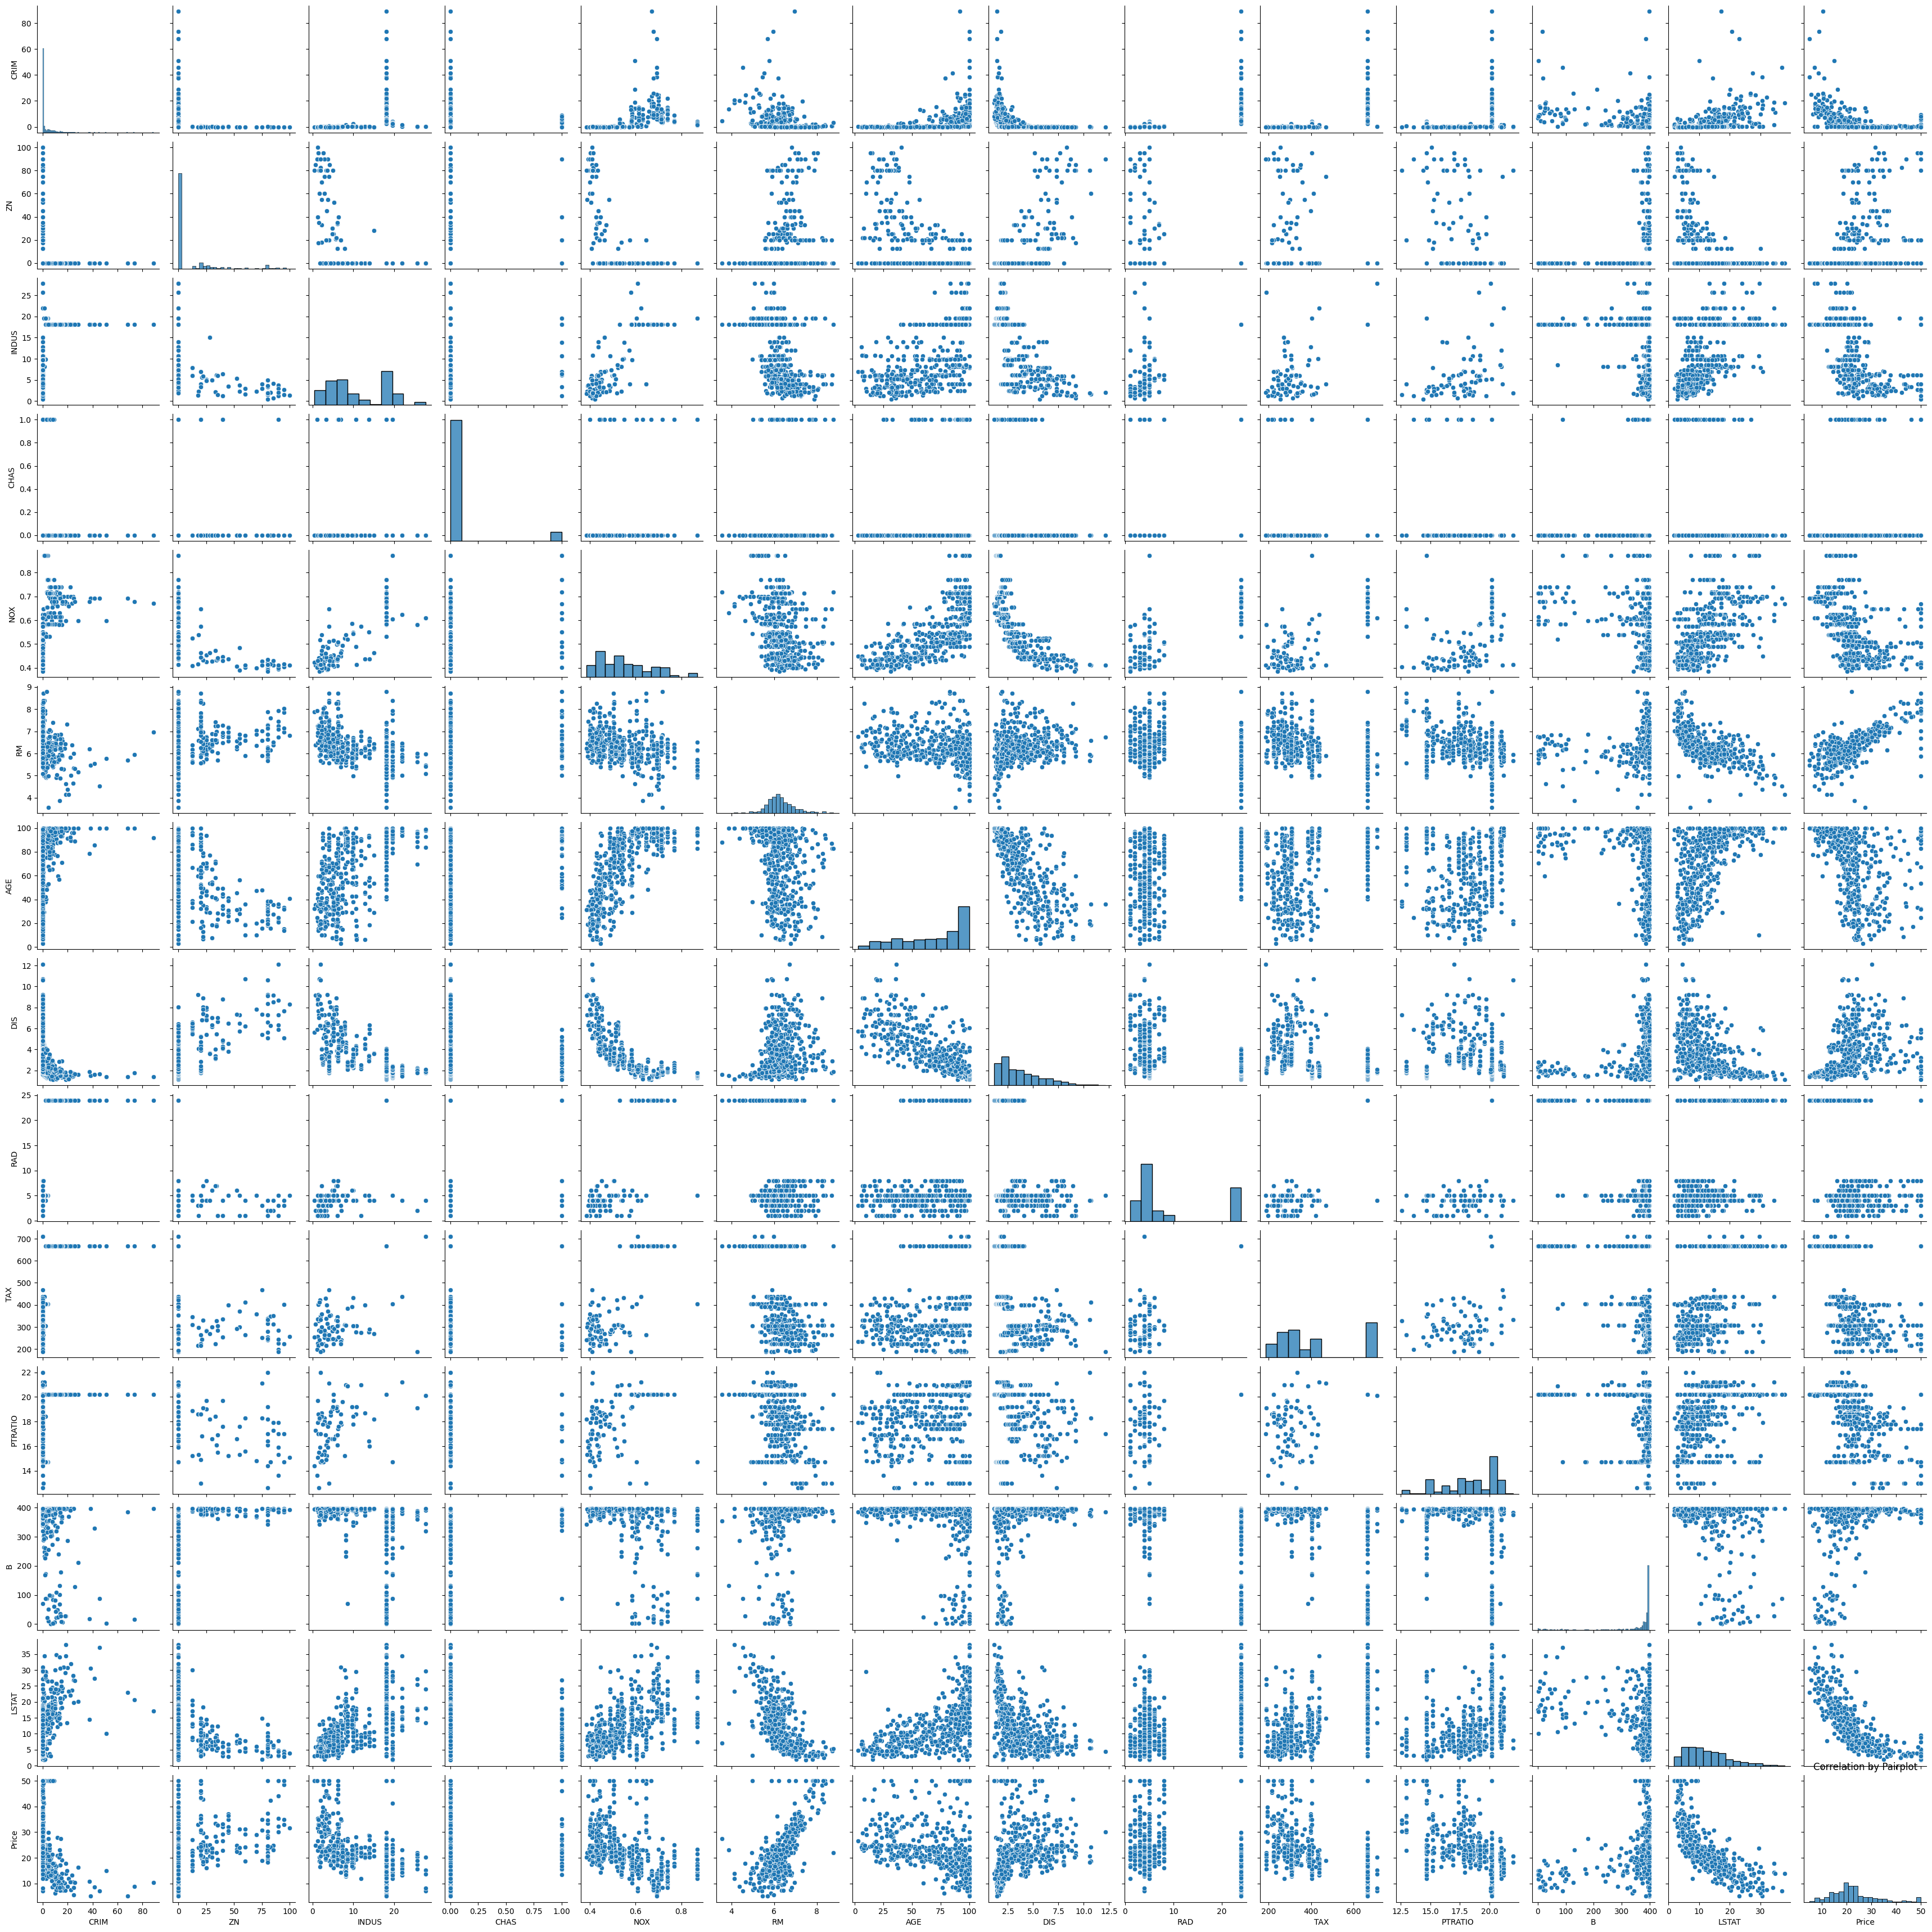

In [15]:
plt.figure(figsize = (20,15))
sns.pairplot(df)
plt.title('Correlation by Pairplot')
plt.show()

<Figure size 1000x800 with 0 Axes>

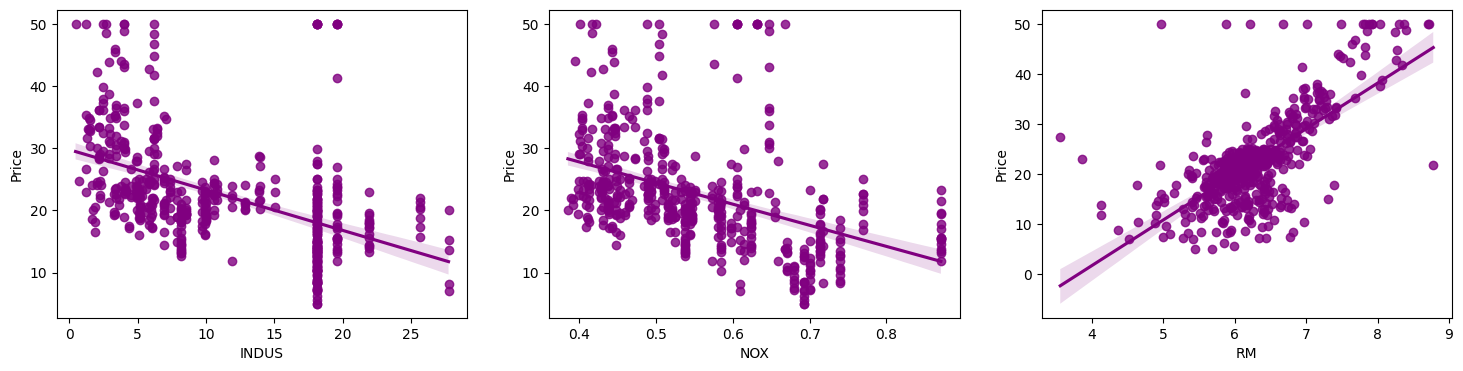

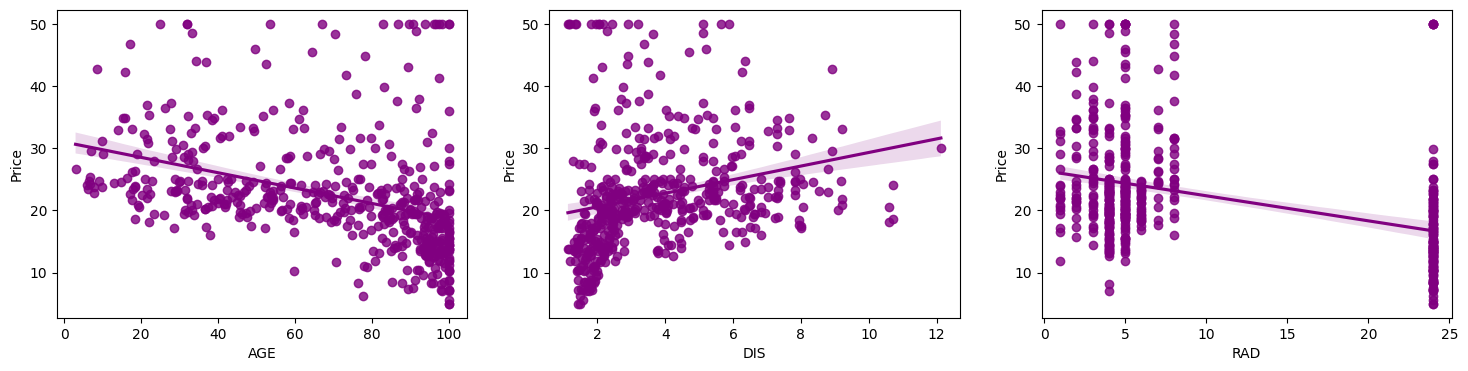

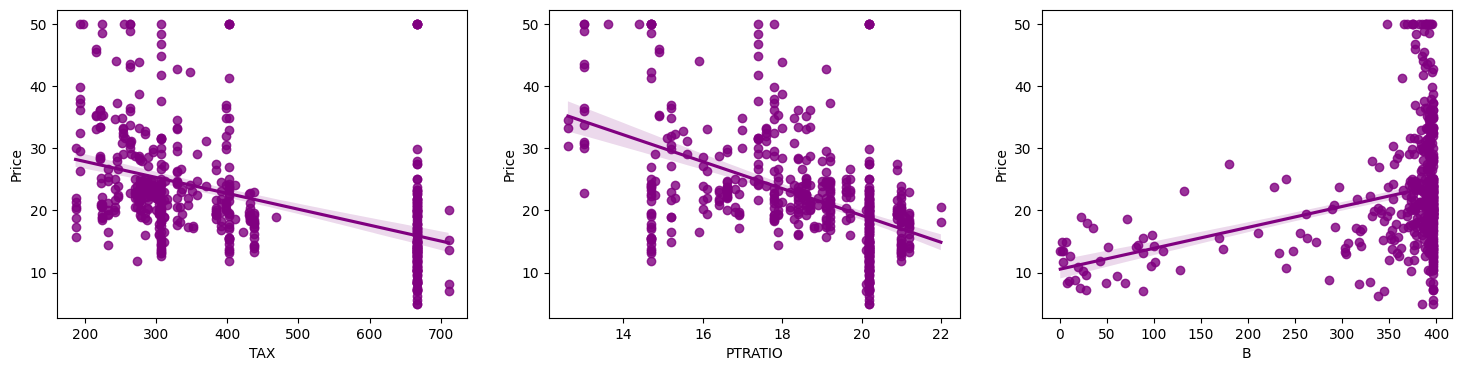

In [16]:
feature_columns = [col for col in df.columns if col not in ('Price','CHAS','CRIM','ZN')]

# Create a new figure
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

for i in range(0, len(feature_columns) - 1, 3):
    columns_to_plot = feature_columns[i:i+3]
    plt.figure(figsize=(18, 4))
    for j, column in enumerate(columns_to_plot):
        plt.subplot(1, 3, j+1)
        sns.regplot(x=column, y='Price', data=df, color= 'purple')
        plt.xlabel(column)
        plt.ylabel('Price')
    plt.show()

#### Insights :
<pre>There are not very much Correlation between other features with target but, there are some features where the Correlation bewteen them and target is more than 70% and they are as follows :

    `RM` with `Price` ---> 70% correlated
    `LSTAT` with `Price` ---> -74% negatively correlated
    
and some features are correlated between 38% to 51% which are:
    
    `CRIM` with `Price` ---> -39% negatively correlated
    `INDUX` with `Price` ---> -48% negatively correlated
    `NOX` with `Price` ---> -43% negatively correlated
    `AGE` with `Price` ---> -38% negatively correlated
    `RAD` with `Price` ---> -38% negatively correlated
    `TAX` with `Price` ---> -47% negatively correlated
    `PTRATIO` with `Price` ---> -51% negatively correlated

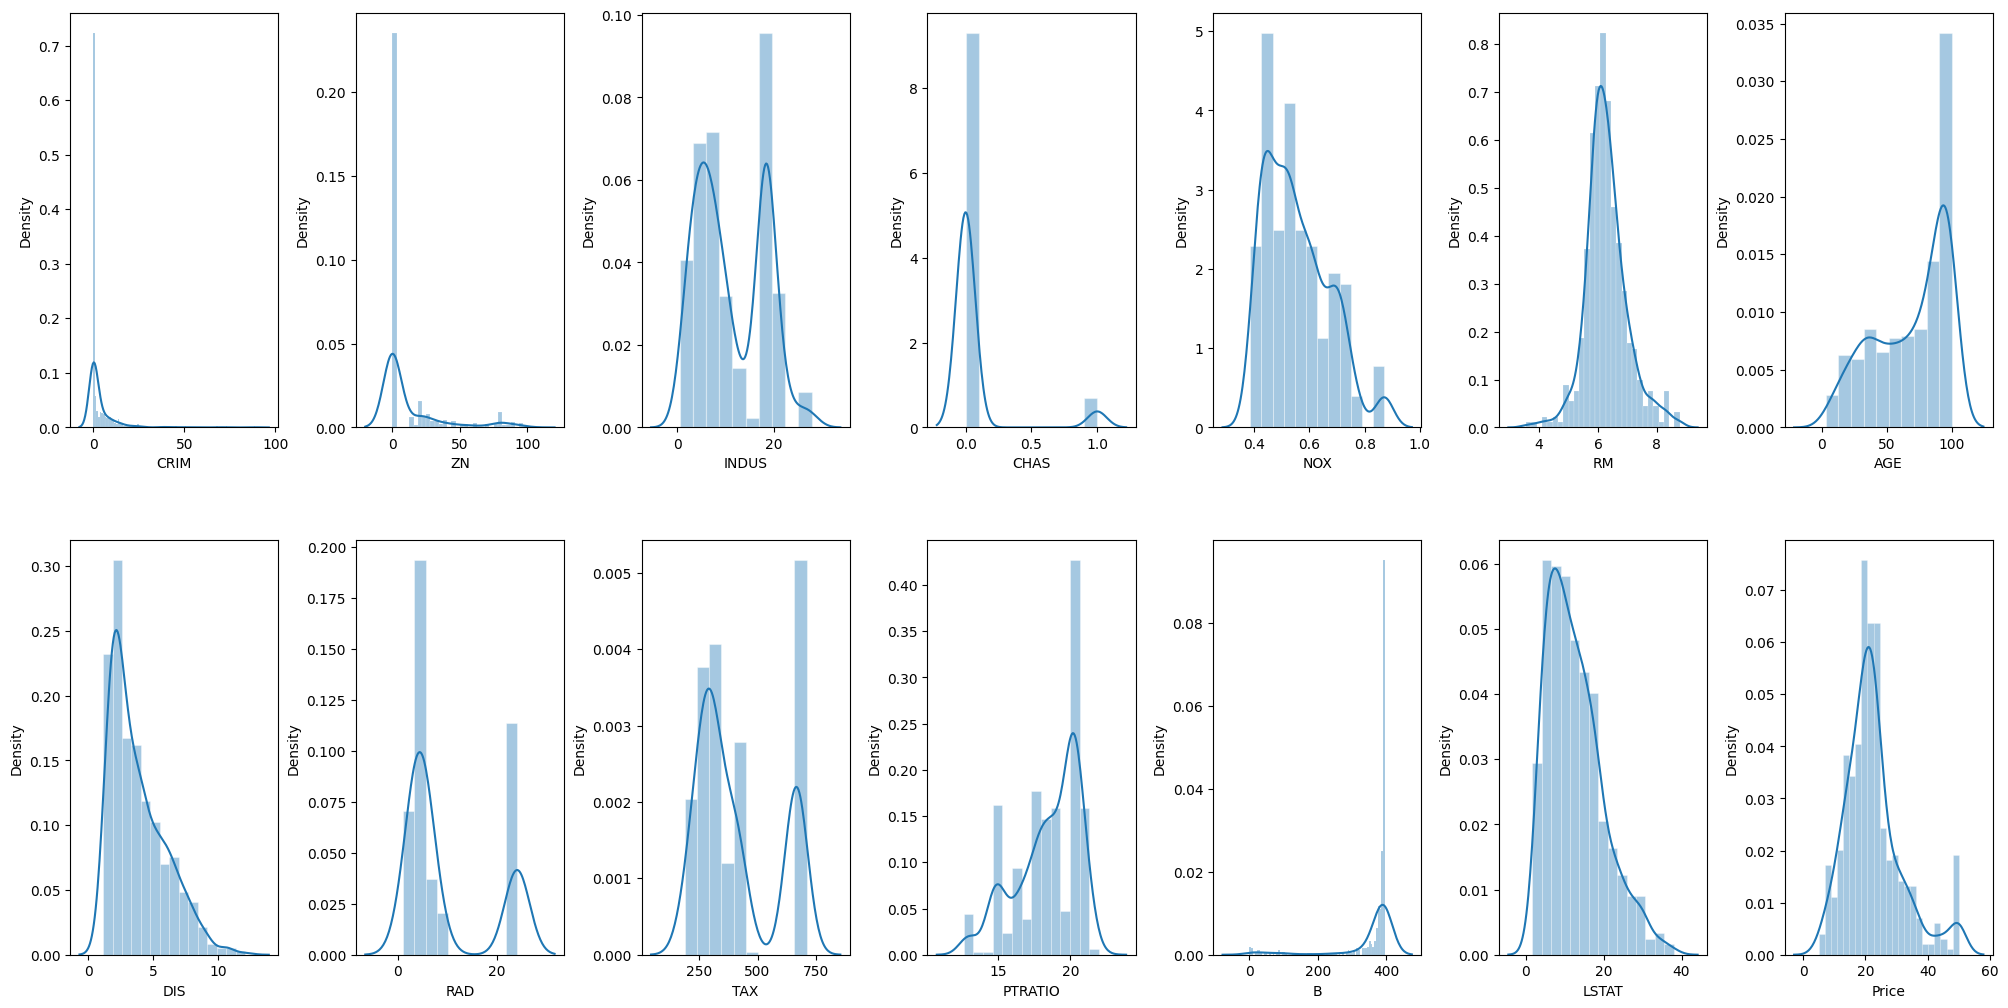

In [17]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.histplot(v, ax=axs[index], kde=True, stat="density", kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, .4))
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


## Independent and Dependent Features

In [18]:
# Seperating Our Independent Feature and Target Column
x = df.drop('Price', axis = 1)
y = df['Price']

<pre>We have Seperated Our Features and Target column

In [19]:
# Train-Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=21)

<pre>We have done Train-Test Split part

## Standardizing the Data

In [20]:
# using StandardScaler we are Standardizing our x_train and x_test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### Insights:
<pre>Standardization is very crucial part of preprocessing the data, 
when it comes to reduce your model complexity and time consumption.
It Normzlize the Spread of your data

## Model Training

In [21]:
# Selecting the Algorithm
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [22]:
reg.fit(x_train, y_train)

LinearRegression()

In [23]:
# print the coefficient of the intercept
print(reg.coef_)

[-0.67387449  1.07324125  0.1338823   0.82724178 -2.14760957  2.393615
  0.08868645 -2.9388251   2.84023588 -2.03450628 -2.24964637  0.96395008
 -3.83930469]


In [24]:
print(reg.intercept_)

22.587128712871287


In [25]:
# on which parameters the model has been trained
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [26]:
# Prediction with test data
reg_pred = reg.predict(x_test)

In [27]:
reg_pred

array([15.31156753, 15.32418722, 26.89085511, 37.38487578, 33.37521954,
       12.47788473, 25.66150052, 30.22315683, 33.74301138, 18.81683527,
       23.88929321, 16.72595084, 28.69709278,  9.23230063, 18.90773133,
       27.88573498, 15.89506169, 29.20232576,  3.88332235, 17.68200542,
       20.8191842 , 26.31504103, 19.33169886,  2.19220243, 20.38094353,
       34.07653064, 25.06164648, 31.0391338 , 16.89541457, 24.78433121,
       25.05924042, 18.9848461 , 33.69821141, 13.27514144, 27.64403169,
       30.81484939, 34.89386623, 21.37297075, 21.30095973, 17.67161922,
       19.31199626, 33.32238917, 24.5035588 , 25.2735153 , 22.02939631,
       20.48623141, 30.03761787, 21.20814046, 30.71166953, 23.45485205,
       34.13332772, 14.9680039 , 40.84817156, 17.01102777, 13.89629206,
       11.00003214,  8.18503156, 23.19580513, 22.39930775, 27.61299186,
       17.19450364, 35.19323298, 24.66336773, 22.45853267, 35.19214376,
       36.6617584 , 29.25000933, 19.48608867, 21.3253395 , 19.47

## Assumptions

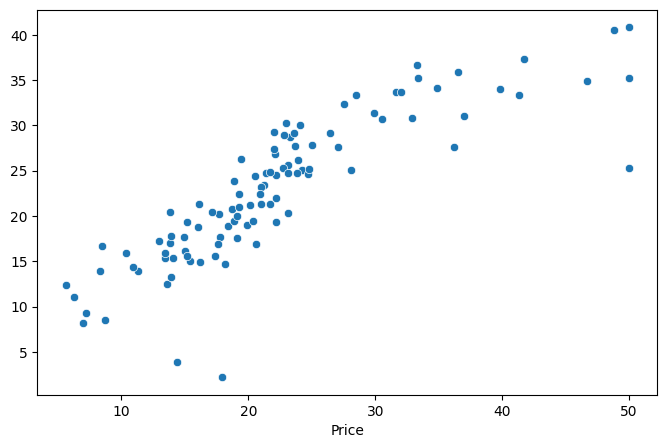

In [28]:
# plot a scatter plot for the prediction 
plt.figure(figsize = (8,5))
sns.scatterplot(x = y_test, y = reg_pred)
plt.show()

In [29]:
# Residuals 
residuals = y_test - reg_pred

In [30]:
residuals

455   -1.211568
142   -1.924187
311   -4.790855
232    4.315124
290   -4.875220
         ...   
486   -0.927912
468    1.586198
302   -2.772278
244    0.695379
321   -1.667296
Name: Price, Length: 102, dtype: float64

<Figure size 800x500 with 0 Axes>

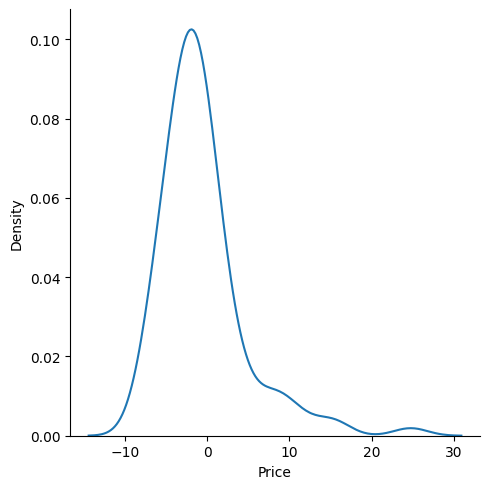

In [31]:
# plotting the residuals 
plt.figure(figsize = (8,5))
sns.displot(residuals, kind = 'kde')
plt.show()

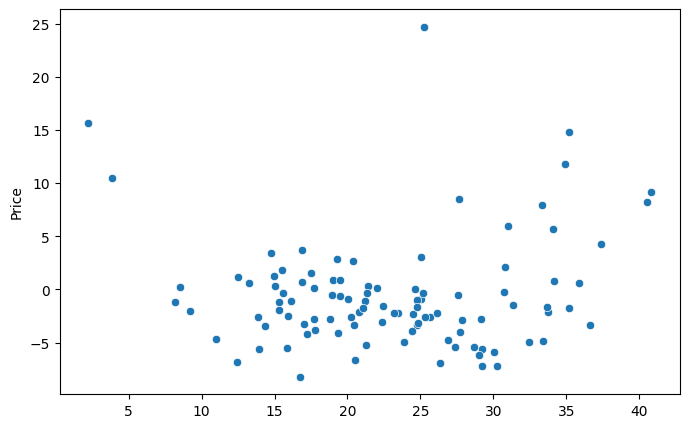

In [32]:
# scatter plot with respect to prediction and residuals 
# uniform distribution
plt.figure(figsize = (8,5))
sns.scatterplot(x = reg_pred, y = residuals)
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2

print('Mean Squared Error : ', mse(y_test, reg_pred))
print('Mean Absolute Error : ', mae(y_test, reg_pred))
print('Absolute Mean Squared Error : ', np.sqrt(mse(y_test, reg_pred)))
print('R Square Error : ', r2(y_test, reg_pred))
print('Adjusted R Square : ', 1 - (1-r2(y_test, reg_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

Mean Squared Error :  26.825400573939334
Mean Absolute Error :  3.6644624256990106
Absolute Mean Squared Error :  5.1793243356580145
R Square Error :  0.7149364161392218
Adjusted R Square :  0.6728247503416068


In [34]:
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression (L1 Regularization)
lasso_reg = Lasso(alpha=0.01)  # You can adjust the alpha (regularization strength).
lasso_reg.fit(x_train, y_train)
y_pred = lasso_reg.predict(x_test)
r2_lasso = r2(y_test, y_pred)
mse_lasso = mse(y_test, y_pred)

# Ridge Regression (L2 Regularization)
ridge_reg = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength).
ridge_reg.fit(x_train, y_train)
y_pred = ridge_reg.predict(x_test)
r2_ridge = r2(y_test, y_pred)
mse_ridge = mse(y_test, y_pred)

print("Lasso Regression - R2:", r2_lasso, "MSE:", mse_lasso)
print("Ridge Regression - R2:", r2_ridge, "MSE:", mse_ridge)

Lasso Regression - R2: 0.7151052507629754 MSE: 26.809512692535474
Ridge Regression - R2: 0.7150088802290873 MSE: 26.81858146989406


## New Data Prediction

In [40]:
new_pre = boston.data[0].reshape(1,-1)

In [41]:
# transformation of new data
scaled_new_pre = scaler.transform(new_pre)

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [42]:
reg.predict(scaled_new_pre)

array([30.22211])

## Pickling the Model file for Deployment

In [43]:
import pickle

In [44]:
pickle.dump(reg,open('regmodel.pkl','wb'))

In [45]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [46]:
# Prediction
pickled_model.predict(scaled_new_pre)

array([30.22211])